
# Project 1: Data Exploration and Analysis
**MSDS 7331 – Machine Learning I**  
**Group JAW(5):** Jeff Nguyen, Adam Ruthford, William Hinton  
**Date:** 24MAY2020

## Business Understanding
Small businesses form the backbone of the American economy. They are responsible for 49.2% of private sector employment and represent one third of U.S. exports(please see [SBA FAQ](https://www.sba.gov/sites/default/files/FAQ_Sept_2012.pdf)). One of the primary ways the government supports small businesses is through loan guarantees. The data set examined in this paper contains historical information about loans guaranteed by the Small Business Administration or SBA. To be clear, the SBA does not loan money instead it guarantees a portion of the loans made by private banks. This paper uses a data set provided on the Kaggle website. Included with the dataset is a detailed breakdown of the dataset that is referenced within this paper, please see the following link([Kaggle: Should this loan be approved or denied](https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied))
  
This paper will discuss using the dataset to answer questions about the success of loans guaranteed by the SBA. The most logical measure of success for a business loan is the “MIS_Status” column which indicates whether the loan was paid off in full or some portion of it had to be charged off as unrecoverable. Also, for loans that must be charged off, response data exists for both the date a loan is charged off and the total amount of the charge off or loss. This should facilitate a deeper examination of exactly when and by how much a small business failed. Thus, we can discriminate between those business that failed quickly and those that maybe had a better chance of succeeding but ultimately failed. Since in its simplest form this is a classification model accuracy will be an important measure. We plan to use cross validation and train and test sets measuring accuaracy, the data set has almost 900k records. However, with the availability of many explanatory variables more advanced questions could be asked. As an example, loans could be divided into different groups based on requested amount. Decisions about loans with a lower value loans could be based strictly on accuracy. For larger loans it might be necessary to prioritize denying loans that are likely to fail instead of approving loans likely to succeed. Thus, either precision or recall might be the most relevant measure of success.  
  
With the recent COVID-19 crisis and the resulting economic downturn revitalizing and supporting small businesses becomes more important than probably any other time since the founding of the SBA in 1953. Being able to determine ahead of time which businesses are a good risk and which are a bad risk is vitally important at this time due to the already unprecedented level of loans being guaranteed by the SBA.


## Data Meaning Type

In [34]:
#Import data manipulation, vizulization, and ML Packages
import pandas as pd

#load data into pandas dataframe
loans = pd.read_csv('SBAnational.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



A detailed explanation for each variable follows.

**LoanNr_ChkDgt:**  Defined as an integer. This number represent a primary key that distinguishes one loan from another. The number itself is not useful for predictive purposes. However, it can be checked to ensure the dataset does not have duplicates.  

**Name:** The name of the entity receiving a loan. Defined in the data set as an object/string. As is this data would be of little use. Derived variable could be made from this column such. For instance, from the examples above all records with "DDS" could be obtained and questions could be answered about how loans to dentist performance.  
  
**City, State, Zip:** Standard geographic information fields for the loan recipient define as object/string for City and State and int for zip code. Data can be broken down by any of these columns to see if regional differences play a part in loan performance.  
  
**Bank:** The name of the bank presented as an object/string. Could be used to detail bank specific performance with respect to loan performance. Allows us to ask and answer questions like "Which bank has the worst performing loan portfolio?"

**BankState:** This column is presented as an object/string. The state the bank making the loan is located in. All references to "Bank" probably need to include the "BankState" to ensure different banks are not mixed.  
  
**NAICS:** The column is presented as an integer. "NAICS" stands for "North American Industry Classification System". This code consists of six digits, the first two digits are used to indicate the industry sector the company receiving the loan is in. The other digits in the code further identify which subsector, industry group, NAICS industry, and national industry the company receiving the loan belongs to. This will allow detailed information to be obtained on loan performance by sector. However, even the small sampling of data above reveals that missing data in the form of "0"s exist for some records and some method of accounting for the missing data will need to be devised. The following website was used in researching the [NAISC codes](https://www.naics.com/).  
  
**ApprovalDate and ApprovalFY:** These columns are presented as an object/string. The date and fiscal year the loan was approved by the SBA. Performance can be grouped by year and date, as necessary.  
  
**Term:** The column is presented as an integer. This is the loan term in months. This column can be used as a continuous variable as well as being binned and used as an ordered categorical variable, "short term", "long term" loans as an example.

**NoEmp:** The column is presented as an integer. The column contains the number of employees in the business. This column can be used as a continuous variable as well as being binned and used as an ordered categorical variable, "sole proprietorship", "under 5 employees", "between 5 and 20 employees", and "over 20 employees" as an example.

**NewExist:** The column is presented as a integer. This categorical variable indicates whether the business receiving the loan is a new or existing business. This column will need to be recoded in our dataset.

**CreateJob and RetainedJob:** These columns are presented as an integer. The column records the number of jobs created or retained respectively. These variables cannot be used as explanatory variables as they indicate the success of the loan. They are a proxy for loan  success. However, these variables can be used as the response variable in a model that would attempt to maximize job creation and or retention.

**FranchiseCode:** The column is presented as an integer. The column will need to be recast to a category. Values that have "0" or "1" indicate that the small business is not a franchise. Other values indicate the business is a franchise.

**UrbanRural:** The column is presented as an integer. The column will need to be recast to a category. The data in this column is categorical with "Urban" being a 1, "Rural" being a "2", and "0" representing "undefined".

**RevLineCr:** This column is presented as an object/string. The column indicates whether the loan is available as a revolving line of credit. The primary responses are "Y" and "N" although it appears that other values exist.

**LowDoc:** This column is presented as an object/string. The column indicates whether the loan was obtained using a one page "low document" application. The primary responses are "Y" and "N".

**ChgOffDate:** This column is presented as an object/string. As expected, many of the values in this column are "NaN". The column contains the date the loan was written off as uncollectable. Successful loans would have the value of "NaN".

**DisbursementDate:** This column is presented as an object/string. The column has the date the loan money was disbursed to the small business.

**DisbursementGross:** This column is presented as an object/string. The column needs to be converted to a numeric. The gross amount of money loaned to the small business.

**BalanceGross:** This column is presented as an object/string. The column needs to be converted to a numeric. The column contains the remaining balance of the loan.

**MIS_Status:** This column is presented as an object/string. The column is categorical data with values "P I F" and "CHGOFF". This column is the main response column of the dataset.

**ChgOffPrinGr:** This column is presented as an object/string. The column needs to be converted to a numeric. The total amount for failed loans that was non recoverable.

**GrAppv:** This column is presented as an object/string. The column needs to be converted to a numeric. The total amount approved for the loan.

**SBA_Appv:** This column is presented as an object/string. The column needs to be converted to a numeric. This column contains the total amount approved and guaranteed by the SBA.


In [35]:
#Create table containing information about features, data types, formats, and descriptions
loan_info = pd.DataFrame(columns=['Feature Name', 'Data type', 'Count','Preferred Format', 'Description'])
loan_info['Feature Name']=list(loans.columns.values) 
loan_info['Data type']= list(loans.dtypes)

loan_info['Count'] = loans.shape[0]
loan_info['Description']= ['Primary Key', ' Borrower name', 'Borrower city', 'Borrower state', 'Borrower zip code',
                        'Bank name', 'Bank state', 'NAICS Classification code','Date SBA commitment issued',
                        'Fiscal year of commitment','Loan term - months', 'Business employee count', 
                        'Existing=1 or New=2 business','Number of Jobs Created','Number of jobs retained','Franchise code',
                        'Urban=1, Rural =2, undefined = 0','Revolving line of credit: Y/N','LowDoc Loan Program: Y/N',
                        'Loan default date','Disbursement date','Disbursed armount','Gross amount outstanding',
                        'loans status','Charged-off amount','Gross amount approved by bank','SBA guaranteed amount of approved loan']

loan_info['Preferred Format'] = ['Number','Text','Text','Text','Number','Text','Text','Number','Date/Time','Text','Number','Number',
                           'Number','Number','Number','Number','Number','Text','Text','Date/Time','Date/Time','Currency',
                           'Currency','Text','Currency','Currency','Currency']                                  

#Start Table Index at 1 instead of 0
loan_info.index = loan_info.index + 1
loan_info

,Feature Name,Data type,Count,Preferred Format,Description
1,LoanNr_ChkDgt,int64,899164,Number,Primary Key
2,Name,object,899164,Text,Borrower name
3,City,object,899164,Text,Borrower city
4,State,object,899164,Text,Borrower state
5,Zip,int64,899164,Number,Borrower zip code
6,Bank,object,899164,Text,Bank name
7,BankState,object,899164,Text,Bank state
8,NAICS,int64,899164,Number,NAICS Classification code
9,ApprovalDate,object,899164,Date/Time,Date SBA commitment issued
10,ApprovalFY,object,899164,Text,Fiscal year of commitment


The table shows that this data is acceptable for use in this project as there are more than 10 features, it has over 30,000 records, and has a mix of continuous and categorical variables.

We can see that there are discrepancies between data type and preferred format.  The preferred format is the format a feature should take given if it categorical, nominal, ordinal, interval, or ratio data.  Integer and float data types should correspond to nominal, ordinal, interval, and ratio data.  While categorical data should correspond string if it is text in nature or integer if the data has several levels or is dummy coded.  Feature data types, along with missing values, duplicate data, and outliers will be address in the Data Quality section.

## Data Quality

Before addressing missing values, duplicate data and outliers, several feature data types from the raw data are not in the desired format for use.  Several features contain continuous data or date data are coded as strings and need to be converted to the apporpriate data type to allow for proper ingestion when modeling is performed.

**DisbursementGross**, **BalanceGross**, **ChgOffPrinGr**, **GrAppv**, **SBA_Appv** are features that deal with currency and are coded as strings which include '$' and ',' characters. Used this website for help with [converting currency to float.](
https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas)
  To treat these features as continuous data the special characters were removed, and the data was converted to the float data type.  This will allow for the data to be used by methods that utilize continous data.  **ApprovalDate**, **ChgOffDate**, and **DisbursementDate** are features that contain dates and were converted to the date/time data type.  This will be usefull for potential time series analysis.  **NewExist** is a categorical feature but has a float data type.  This feature was converted to an integer data type since float is better suited for continuous data.  **Zip**, **NAICS**, **FranchiseCode** are nominal features, but will be converted to strings for ease of manipulation and data cleaning.


In [0]:
import numpy as np

# Create lists of features that need their data types converted
currency = ['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']
date = ['ApprovalDate','ChgOffDate','DisbursementDate']
cat_variables = ['Zip','NAICS','FranchiseCode']

# Convert features to appropriate data types
loans[currency] = loans[currency].replace('[\$,]', '', regex=True).astype(float)
loans[date]= loans[date].astype(np.datetime64)
loans['NewExist'] = loans['NewExist'].astype('Int64')
loans[cat_variables] = loans[cat_variables].astype(str)

In [37]:
# code gives list of columns and count of nulls and uniques values
LoanCol = pd.Series(loans.columns)
LoanCountDF = loans[LoanCol].agg(['count', 'size', 'nunique']).T
LoanCountDF['Null_Record_Count'] = LoanCountDF['size'] - LoanCountDF['count']
LoanCountDF['Number_of_Unique_Values'] = LoanCountDF['nunique']
LoanCountDF = LoanCountDF.loc[:,['Null_Record_Count','Number_of_Unique_Values']]
LoanCountDF

,Null_Record_Count,Number_of_Unique_Values
LoanNr_ChkDgt,0,899164
Name,14,779583
City,30,32581
State,14,51
Zip,0,33611
Bank,1559,5802
BankState,1566,56
NAICS,0,1312
ApprovalDate,0,9859
ApprovalFY,0,70


Names for 14 applications found in **Name** are not contained in the dataset and cannot be filled without identifying the loan applicant.  Since there are 14 rows with missing values they will be removed since they will not significantly impact the data. If unique identification of records is required **'LoanNr_ChkDgt'** values can be used to uniquely identify each row since it serves as a primary key.

**City** and **State** null values were addressed, and the methodology can be seen at the end of this section.

**Bank** contain 1559 null records and **BankState** contained 1566 missing records. It was difficult to identify a bank's state if the name of the bank is not recorded, and difficult to identify the bank's name regardless of other the other features as it must be entered at the time of application.  For these features null values were replaced as "Not Listed".

136 records were null for the **NewExist** feature.  These records were replaced with 0 to match the data type of integer for the feature and indicate that no values were entered for that particular record.

**RevLineCr** and **LowDoc** are both nominal categorical records with 4528 and 2582 missing records respectively. Missing values were replaced with "Not Provided".

**ChgoffDate** contained 736465 null values which indicates that the loan did not default.  Because this features data type is date/time were changed to '0000-00-00' to indicate that the loan is **not** in default.

The 2368 null values for **DisbursementDate** suggest that loan capital was not disbursed.  Records that did not have a disbursement date were assigned "0000-00-00" to indicate that there is no disbursement date associated with the record.

Addressing 1997 null records for **MIS_Status** was unique in that it was dependent on several attributes in the dataset. There were four different combinations of code used to address the null records for this feature.  The first combination identified null values that had a non-null value in the **ChgOffDate** feature and that the **ChgOffPrinGr** feature was not equal to zero; this combination of conditional requirements identified records that defaulted and had a charge off balance and renamed the null values as "CHGOFF".  The second combination identified null values where **DisbursementDate** was not null and the **BalanceGross** was equal to zero; this combination of features identifies records that did not receive funds and do not have a balance, this labeled the null values as "P I F".  The third and fourth combination identify null MIS_Status records where funds were not disbursed by checking **DisbursementGross** and **BalanceGross** features.  If the **DisbursementGross**was zero or null and the **BalanceGross** was 0, the missing data was labels as "Not Disbursed".

In [0]:
#Fill In NaN fields
loans.dropna(subset = ['Name'], inplace = True)
loans["Bank"].fillna("Not Listed", inplace = True) 
loans["BankState"].fillna("Not Listed", inplace = True) 
loans['NewExist'].fillna(0, inplace = True)
loans['RevLineCr'].fillna("Not Provided", inplace = True)
loans['LowDoc'].fillna("Not Provided", inplace = True)
loans['ChgOffDate'].fillna("0000-00-00",inplace = True)
loans['DisbursementDate'].fillna("0000-00-00",inplace = True)

#Replace NaT MIS_status with CHGOFF if their ChgOffDate is not null
#If MIS_Status has value, 
loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) & 
                         ((loans['ChgOffDate'].notnull()) |
                          (loans['ChgOffPrinGr']!=0.0)),'CHGOFF',inplace=True) 

loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) &
                         (loans['DisbursementDate'].notnull()) & 
                         (loans['BalanceGross']==0.0),'P I F',inplace=True)

loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) &
                         (loans['DisbursementGross'].isnull()) & 
                         (loans['BalanceGross']==0.0),'Not Disbursed',inplace=True)

loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) &
                         (loans['DisbursementGross']==0.0) & 
                         (loans['BalanceGross']==0.0),'Not Disbursed',inplace=True)

Several null values were also present in the **City** and **State** features. **City** contained 14 null values and **State** contained 30 null values.  Both features describe the loan applicant's address information.  For **City** null values, zip codes from the **Zip** feature and the United States Postal Service Zip Code Lookup tool (https://tools.usps.com/zip-code-lookup.htm?citybyzipcode) were used to identify the correct city or state name.  Two zip-codes in **City** feature and two zip-codes in the **State** feature did not return a city in the United States and were left as 'NaN'.  Since there are only 4 rows of data that do not have proper city or state data, they will be kept or removed depending on the machine learning algorithm used.

In [0]:
# Replace City NA with appropriate state/city name
cityList = ['Salt Lake City','New Orleans','Chicago','Chicago','San Diego','San Diego','San Diego','San Diego',
            'San Diego','San Diego','Clevland','St. Louis','St. Louis','St. Louis','St. Louis','St. Louis',
            'St. Louis','Seattle','Des Moines','San Antonio','Kansas City','Kansas City','Quincy','Quincy','Boston',
            'NaN','NaN','Louisville','Wilmington','Flint']
stateList = ['NaN','NaN','CA','AP','KS','TX','FL','WI','NJ','UT','MO','TX','TX','TX']

#Replace Cities with NAs with appropriate City or State    
loans.loc[loans.City.isnull(),'City'] = cityList
loans.loc[loans.State.isnull(),'State'] = stateList

Zipcode need to be normalized. Originally this was stored as an integer, thus leading zeros were removed. The following code restores the leading zeros. Also, note that the first zip code is 00501. Values lower than that are bad data.

In [0]:
# Fix Zip code normalize so leading zeros are not missing
loans['Zip'] = pd.Series('00000' + loans['Zip'].values).str.slice(-5,)
# lowest zip code is 00501. Can test for count of lower ones with following code
# len(loans[loans['Zip'].astype(int) < 501]) # returns 400

The .info() function below can be run on the 'loans' data frame after data cleaning is complete to check for null values and that each feature has the correct data type.  After running the function, we can see that 24 of the 27 features have had null values corrected and that all of the features are set to the correct data type.  One feature still contains null values: 'Name'.  Names for 14 applications are not contained in the dataset and cannot be filled without identifying the loan applicant.  However,'LoanNr_ChkDgt' values can be used to uniquely identify each row since it serves as a primary key.

In [41]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899150 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899150 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899150 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899136 non-null  object        
 5   Bank               899150 non-null  object        
 6   BankState          899150 non-null  object        
 7   NAICS              899150 non-null  object        
 8   ApprovalDate       899150 non-null  datetime64[ns]
 9   ApprovalFY         899150 non-null  object        
 10  Term               899150 non-null  int64         
 11  NoEmp              899150 non-null  int64         
 12  NewExist           899150 non-null  Int64         
 13  CreateJob          899150 non-null  int64   

### Outliers

Boxplots were used to visually identify the number of potential outliers for the continuous data in the **loans** dataframe.  The data was plotted without modification, and with values transformed using log10.  **DisbursementGross**, **BalanceGross**, **ChgOffPrinGr**, **GrAppv**, and **SBA_Appv** were plotted separately as the range of their data is much larger than **NoEmp**, **Term**, **CreateJob**, and **RetainedJob**.  Plotting these features together would have made it difficult to spot outliers since there are two groups of continuous data have vastly different ranges.  For the raw data seen in the 'Continuous Currency Features' plot a large volume of outliers are present as the amount of money considered and disbursed to a company is dependent on the small business' needs and their size.  For the 'Business Attribute Features' plot **NoEmp**, **CreateJob**, **RetainedJob** related to employees for each business and the variation and spread seen in the boxplots is dependent on the size and type of work each of the small businesses preform; due to this large spread there are also a large volume of outliers.  For **Term** the variation is much less as banks offer a limited variety of options for loan repayment, there are still several outliers as the small companies requesting longer loans may be a smaller company that prefers smaller loan payments. 

Text(0, 0.5, 'Loan Amount - $')

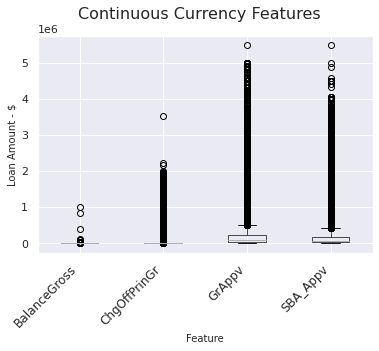

In [42]:
import matplotlib.pyplot as plt
#create matrix of continuous data
continuous_data2 = loans[['BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']]
#plot the data
continuous_data2.boxplot()
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Continuous Currency Features', fontsize=16)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Loan Amount - $', fontsize=10)

Text(0, 0.5, 'Count')

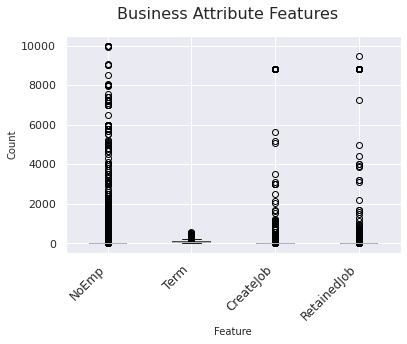

In [43]:
continuous_data1 = loans[['NoEmp','Term','CreateJob','RetainedJob']]
#plot the data
continuous_data1.boxplot()
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Business Attribute Features', fontsize=16)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Count', fontsize=10)

After log10 transformation **GrAppv** and **SBA_Appr** feautre appear more symetric, however still contain outliers.  **BalanceGross** and **ChgOffPrinGr** appear to be all outliers. **ChgoffPrinGr** 737139  and **BalanceGross** 899136 features contain values that captures the amount of loan that is owed when it has defaulted and the remaining balance of a loan. Both **ChgoffPrinGr** and **BalanceGross** have median values of 0, with 737139 and 899136 zero values, respectively.  For these features if there are large values, and much of the data is zero valued, they will show as outliers.

For the 'Business Attribute Features': **NoEmp**, **Term**, **CreateJobs**, and **RetainedJobs** contain a large number of outliers in the tails. Converting heavily skewed features removes the normality requirement for required for some machine learning algorithms.

Text(0, 0.5, 'Loan Amount - $')

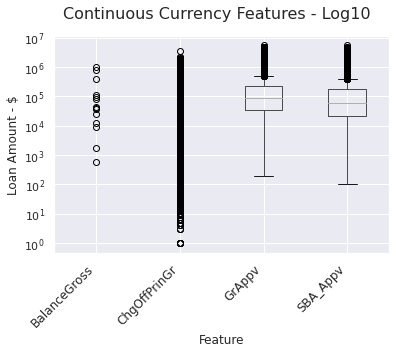

In [47]:
ax2 = continuous_data2.boxplot()
ax2.set_yscale('log')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Continuous Currency Features - Log10', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Loan Amount - $', fontsize=12)

Text(0, 0.5, 'Count')

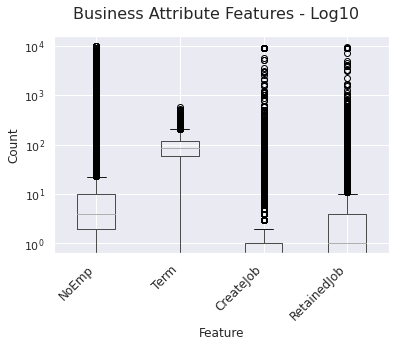

In [46]:
ax2 = continuous_data1.boxplot()
ax2.set_yscale('log')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Business Attribute Features - Log10', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

Outliers will be addressed on a case-by-case basis.  Several machine learning algorithms, such as multiple linear regression (MLR), prefer data to be normal.  If MLR is used the data will be transformed via log transform or standardization and outliers can be removed if the they are egregious and significantly away from the main distribution of data. Alternatively, features with large numbers of outliers can be converted to categorical features by creating bins that capture all values within the feature of concern. For some classification algorithms normality and outliers are not a requirement of the algorithm and may not adversely affect its operation.  In these cases, the outliers may be kept.  For exploratory analysis we will keep outliers, as we will be using log distributions since they are easier to visualize and are easier to interpret.  Please see the data visualization section for more detail.

## Simple Statistics

There are a total of nine continuous features in this dataset where statistics can be performed.  When using the .describe() function on the loans data set several items can be understood when looking at the summary statistics.  All the continuous features in this data set are right skewed.  When looking the distance between the 50th percentile and the mean we can see that in each case the mean is greater than the median, this suggests that there several large values that increase the value of the mean.  There is further evidence for skewness when looking at maximum values.  For all the features the maximum values are far from the 50th percentile providing more evidence of right skew. Visual inspection with histograms for each continuous feature will be performed in the plots below.  Spread for the **DisbursementGross**, **BalanceGross**, **ChgOffPrinGr**, **GrAppv**, and **SBA_Appv** features are very large, as the majority of loans are small with several very large loans that are also issued.

In [49]:
#Get basic statistics for all features in the data frame
continuous_data = ['NoEmp','Term','CreateJob','RetainedJob','DisbursementGross',
                   'BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']
loans[continuous_data].describe()

,NoEmp,Term,CreateJob,RetainedJob,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899150.000000,899150.000000,899150.000000,899150.000000,8.991500e+05,899150.000000,8.991500e+05,8.991500e+05,8.991500e+05
mean,11.411484,110.773944,8.430504,10.797413,2.011551e+05,2.989396,1.350345e+04,1.926885e+05,1.494901e+05
std,74.108765,78.857538,236.690006,237.122442,2.876423e+05,1442.173140,6.515277e+04,2.832651e+05,2.284159e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,2.000000,60.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,4.000000,84.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,10.000000,120.000000,1.000000,4.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,9999.000000,569.000000,8800.000000,9500.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


A pair of noticable features are **BalanceGross** and **ChgPrinGr**. When BalanceGross and ChgPrinGr are 0 this indicates that the loan has been paid off.  It is expected that the majority of loans have been paid off and when looking at the min, 25th percentile, 50th percentile, and 75th percentiles the data suggests that the majority of the loans have been paid off.

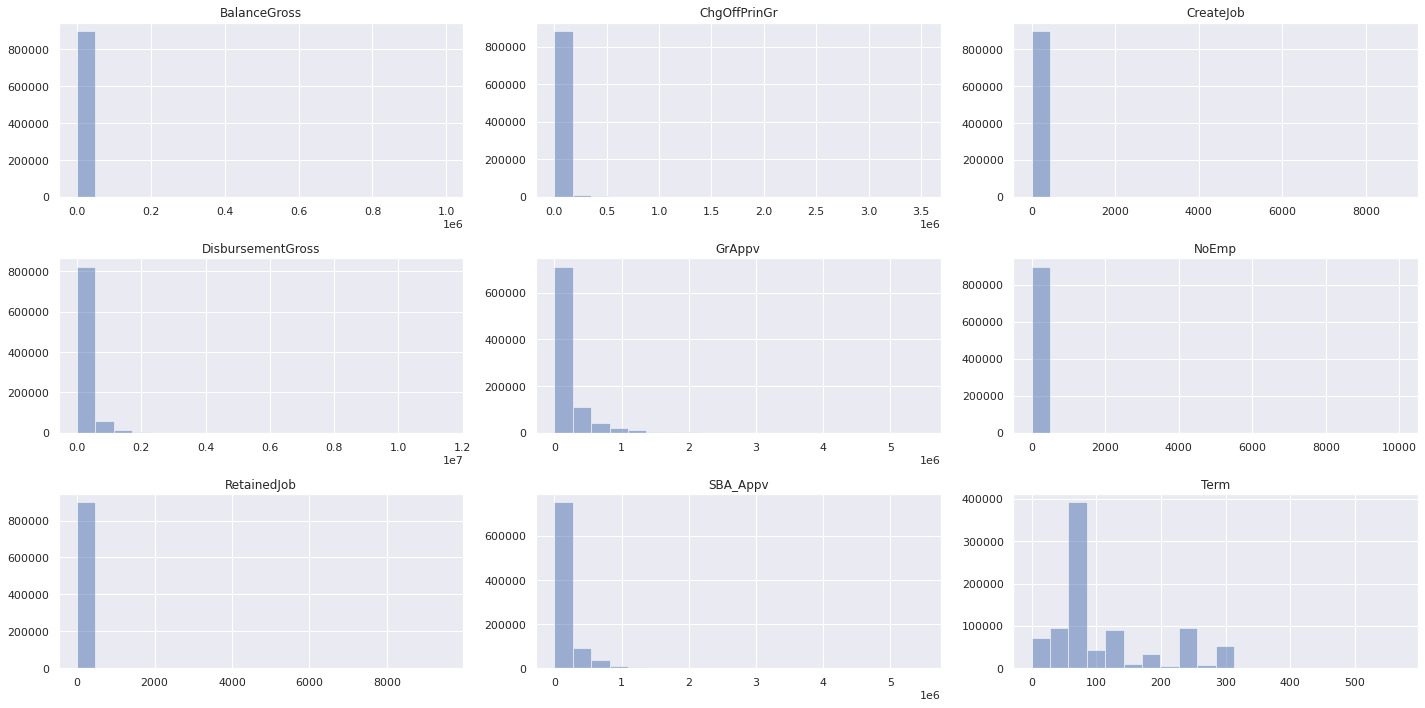

In [50]:
loans[continuous_data].hist(bins = 20,alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [51]:
loans['Term'].value_counts() # term of the loans

84     230160
60      89940
240     85982
120     77653
300     44727
        ...  
402         1
403         1
404         1
409         1
511         1
Name: Term, Length: 412, dtype: int64

The loan terms tells you which terms are the most frequently requested and which loan are more frequently approved. We see that there are 39611 loans for 84 month terms which is a 7 year loan term. This is an indication of what types of terms are mostly likely requested. We do not know what types of loans they are but we know the terms.



In [52]:
#loans that has been approved,

loans['SBA_Appv'].value_counts()

25000.0     49578
12500.0     40146
5000.0      31134
50000.0     25045
10000.0     17009
            ...  
277830.0        1
69458.0         1
277840.0        1
277848.0        1
980212.0        1
Name: SBA_Appv, Length: 38326, dtype: int64

The amount of loan approved varies by distribution and there is one loan approved for 1,202,000 which is the max and the minimum loan amount is 5000.

In [53]:
loans.Term.min(), loans.Term.max(), loans.Term.median(), loans.Term.std(), loans.Term.mean()


(0, 569, 84.0, 78.85753847961365, 110.77394428070956)

When you look at loan terms, one wants to know which bank you should go to to request a loan. Ideally, you would like a 50-50 chance of being approved by going to a bank. We looked at the statistics to see what are the distribution of banks making loans.


In [54]:
loans['Bank'].value_counts()

BANK OF AMERICA NATL ASSOC        86851
WELLS FARGO BANK NATL ASSOC       63501
JPMORGAN CHASE BANK NATL ASSOC    48166
U.S. BANK NATIONAL ASSOCIATION    35143
CITIZENS BANK NATL ASSOC          35054
                                  ...  
FDIC/SEARCH NATIONAL BANK             1
NEW ALBIN SAVINGS BANK                1
FDIC/TALMAGE ST. BANK/TALMAGE         1
NEWTON FEDERAL BANK                   1
HAWTHORN BANCSHARES, INC              1
Name: Bank, Length: 5803, dtype: int64

The statistics above shows the counts of the top five banks and the bottom five banks.  

## Visualize Attributes

A quick pair plot was performed to help identify areas of interest. These areas are discussed in more detail below.

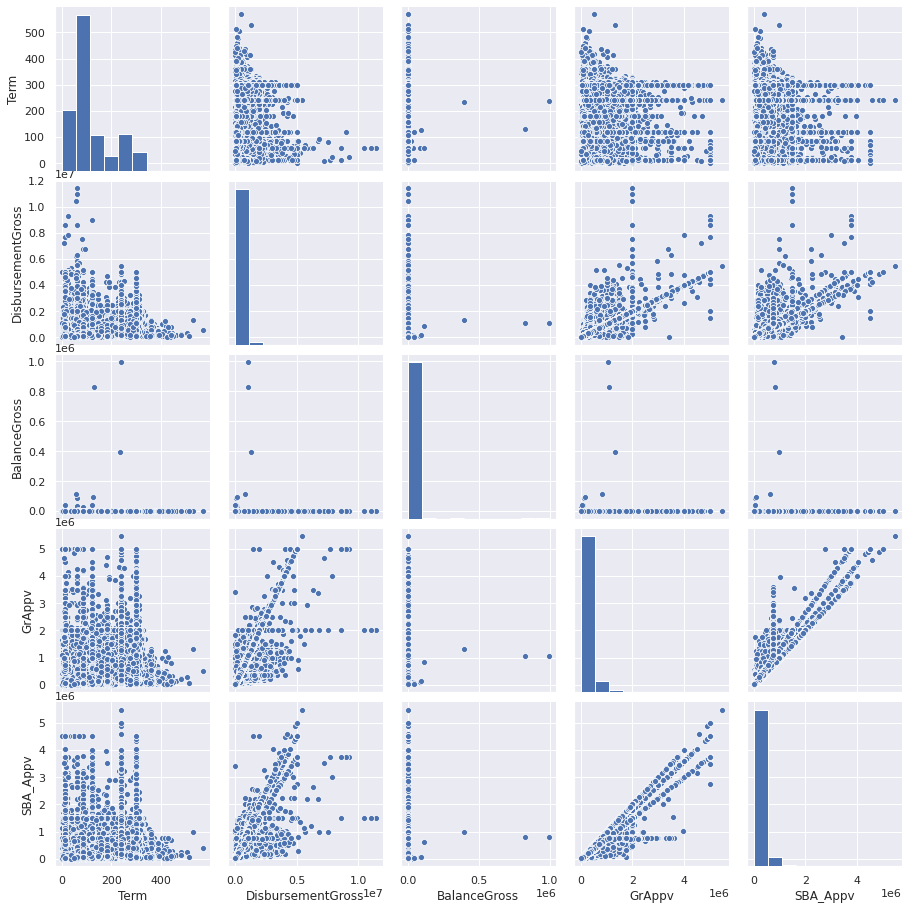

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(loans[['Term','DisbursementGross','BalanceGross','GrAppv','SBA_Appv']])

DisbursementGross shows a definite tendency to the normal distribution after a base ten log transform. The curve does display some defintie spikes near 100K,  also another smaller one at the 10K mark. This graphic yields several things. Round numbers are often used on these loans. Most business loans fall within 10,000 to 1,000,000. 100,000 seems to be near the median value for a small business loan.

Text(0.5, 0, 'Gross Disbursement of loan in base ten log scale')

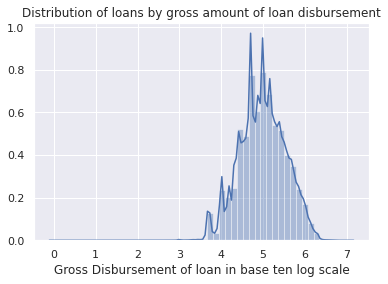

In [56]:
# DisbursementGross Responds really well to a log transformation
DisbursementGrossN0 = loans.loc[loans.DisbursementGross > 0, 'DisbursementGross']
#sns.kdeplot(np.log10(DisbursementGrossN0))
sns.distplot(np.log10(DisbursementGrossN0))
plt.title('Distribution of loans by gross amount of loan disbursement')
plt.xlabel('Gross Disbursement of loan in base ten log scale')

Term shows a continuous series of values through about 120 months. Several spikes exist in the data the most notable at about 84 months. Several other spikes exist in the data and look to be clusterd around certain years. 5, 7, 10, 15, 20, and 25 years have definte peaks. The majority of loans have a term of ten years or less.

Text(0.5, 1.0, 'Distribution of loans by loan term')

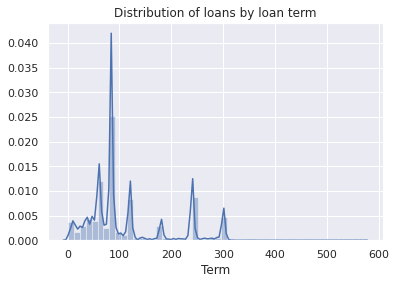

In [57]:
# DisbursementGross Responds really well to a log transformation
TermN0 = loans.loc[((loans.DisbursementGross > 0) & (loans.Term > 0)), 'Term']
#sns.kdeplot(np.log10(TermN0))
#sns.kdeplot(TermN0)
sns.distplot(TermN0)
plt.title('Distribution of loans by loan term')

NoEmp has all of it values clustered around less than 100 employees. I used the [seaborn website](https://seaborn.pydata.org/) for reference. This is a plot of just the businesses with 1 to 100 employees. The vast majority of businesses loaned money have 20 employees or less.

Text(0.5, 0, 'Nummber of Employees')

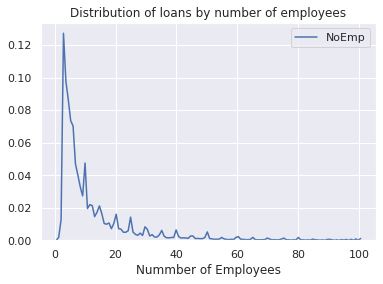

In [58]:
NoEmpN0 = loans.loc[((loans.NoEmp > 0)), 'NoEmp']
sns.kdeplot(NoEmpN0, clip = [1,100])
#plt.show()
plt.title('Distribution of loans by number of employees')
plt.xlabel('Nummber of Employees')

Graph shows the cumulative total of all companies by number of employees. The graph shows that almost 90% of the companies receiving loans have 20 employees or less.

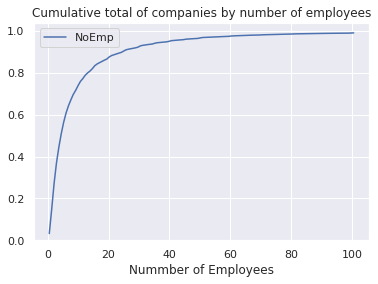

In [59]:
sns.set_style('darkgrid')
sns.kdeplot(NoEmpN0, clip = [1,100], cumulative=True)  # Long Running
plt.xlabel('Nummber of Employees')
plt.title('Cumulative total of companies by number of employees')
sns.set_style('white')

SBA_Appv shows that the amount approved by the SBA is right skewed when compared to either the gross approved or disbursed. This is to be expected since the SBA_Apprv amount represent the total guaranteed by the SBA, this will always be less than the total amount disbursed or approved.

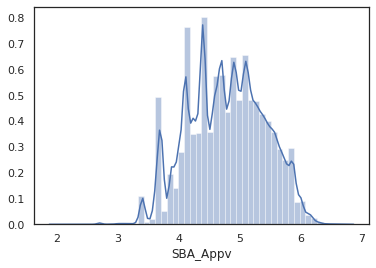

In [60]:
SBA_AppvN0 = loans.loc[loans.SBA_Appv > 0, 'SBA_Appv']
#sns.kdeplot(np.log10(DisbursementGrossN0))
sns.distplot(np.log10(SBA_AppvN0))

GrAppv behave as expected with spikes in roughly the same places as DisbursementGross.

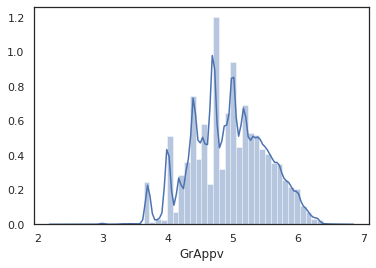

In [61]:
GrAppvN0 = loans.loc[loans.GrAppv > 0, 'GrAppv']
#sns.kdeplot(np.log10(DisbursementGrossN0))
sns.distplot(np.log10(GrAppvN0))

CreateJob has a very similar graph to number of employees. Most loans created 20 or fewer jobs.

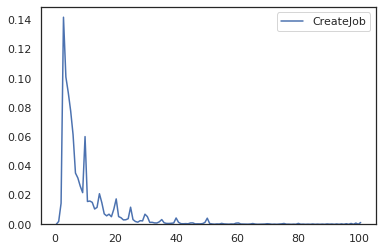

In [62]:
CreateJobN0 = loans.loc[((loans.CreateJob > 0)), 'CreateJob']
sns.kdeplot(CreateJobN0, clip = [1,100])

RetainedJob has a very similar graph to number of employees. Most loans retained 20 or fewer jobs.

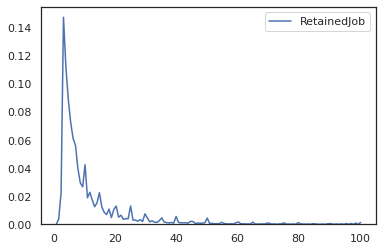

In [63]:
RetainedJobN0 = loans.loc[((loans.RetainedJob > 0)), 'RetainedJob']
sns.kdeplot(RetainedJobN0, clip = [1,100])

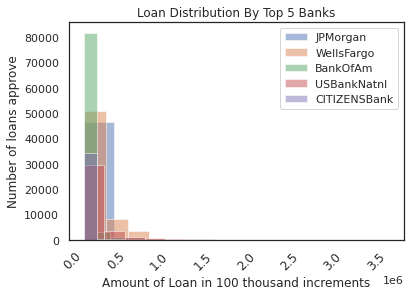

In [64]:
from matplotlib import pyplot as plt
JPMorgan = loans[loans.Bank == "JPMORGAN CHASE BANK NATL ASSOC"]
WellsFargo = loans[loans.Bank == "WELLS FARGO BANK NATL ASSOC"]
BankOfAm = loans[loans.Bank == "BANK OF AMERICA NATL ASSOC"]
USBankNatnl = loans[loans.Bank == "U.S. BANK NATIONAL ASSOCIATION"]
CITIZENSBank = loans[loans.Bank == "CITIZENS BANK NATL ASSOC"]

#good showing of histogram 3 plots
plt.hist(JPMorgan.SBA_Appv, bins=10, label='JPMorgan', alpha=0.5)
plt.hist(WellsFargo.SBA_Appv, bins=10, label='WellsFargo', alpha=0.5)
plt.hist(BankOfAm.SBA_Appv, bins=10, label='BankOfAm', alpha=0.5)
plt.hist(USBankNatnl.SBA_Appv, bins=10, label='USBankNatnl', alpha=0.5)
plt.hist(CITIZENSBank.SBA_Appv, bins=10, label='CITIZENSBank', alpha=0.5)
plt.legend(loc='best')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.xlabel('Amount of Loan in 100 thousand increments')
plt.ylabel('Number of loans approve')
plt.title('Loan Distribution By Top 5 Banks')
plt.show()

This visualization depicts the distribution of loans approved by each bank. These are the top five banks. This histogram show that between small loans between 0-20,000 Bank of American is lending the way. You have JPMorgan Chase coming in second and WellsFargo is leading the way with medium size loans. 


## Explore Joint Attributes

One of the major assumptions for Pearson correlation are that data should be normally distributed.  Because many of the continuous data are right skewed, they were log10 transformed.  Transforming the data allows for a more accurate correlation matrix.  All continuous data values have 1 added to them and the log10 transformation was applied.  This is done to address 0 values, which address the issue of infinite values when log10(0) is calculated.  Histograms for each continuous feature were applied to see if the transformation properly normalized the data.  **DisbursementGross**, **GrAppv**, **NoEmp**, **Term**, and **SBA_Appv** became more normally distributed once log10 transformed.  **BalanceGross**, **ChgOffPrinGr**, **CreateJob**, and **RetainedJob** remained right skewed.  These features maintained their skewness due to the large frequency of values near the 25t percentile, or because there are many values that have the same value that are less than the median.  The more normally distributed data will be moved into a data frame to make a correlation matrix.

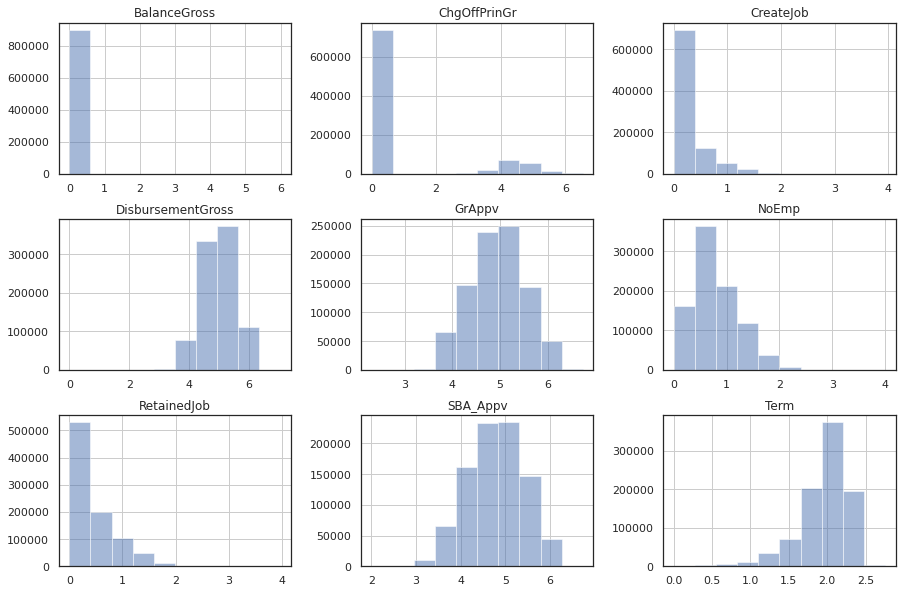

In [65]:
#Create a transformed dataframe of continuous data and add 1 to all values to avoid log10 of 0 which is inf and preform log10 transform
logdata = loans[continuous_data]
logdata +=1
logdata = logdata.apply(np.log10)

#Generate Histograms for continuous features
logdata.hist(alpha=0.5, figsize=(15, 10))
plt.show()

The correlation matrix shows that **DisbursementGross** is strongly and positively with **SBA_Appr** and **GrAppv**; and **SBA_Appr** is strongly and positively correlated with **GrAppv**. **NoEmp** and **Term** feature show moderate or low correlation compared to the remaining features.  **DisbursementGross**, **SBA_Appr** and **GrAppv** all relate to the amount of money a small business is approved for or received and the correlation matrix shows how strongly correlated those values are.  It is most likely that values from **DisbursementGross**, **SBA_Appr** and **GrAppv** are the same or are very close to each other.

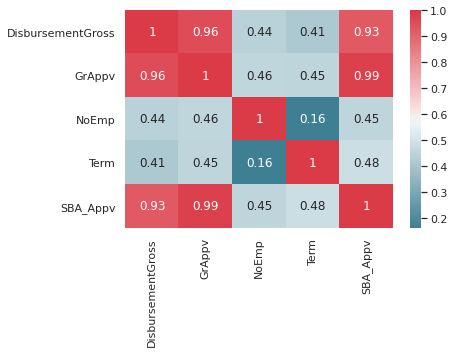

In [66]:
normal_data =['DisbursementGross', 'GrAppv', 'NoEmp', 'Term', 'SBA_Appv']
logdata_corr = logdata[normal_data]

import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

#Generate a correlation matrix of transformed data
sns.set(style="darkgrid") # one of the many styles to plot using
sns.heatmap(logdata_corr.corr(), cmap=cmap, annot=True)

The graph below shows the number of loans disbursed, grouped by amount of loan and term. It is notable that as the term or X coordinate increase the average amount of the loan for each term increases as well. The darkest shaded area appears higher with increases in term. Also, seven year loans in the \$70,000 to \$100,000 amount appear to be the most common. 

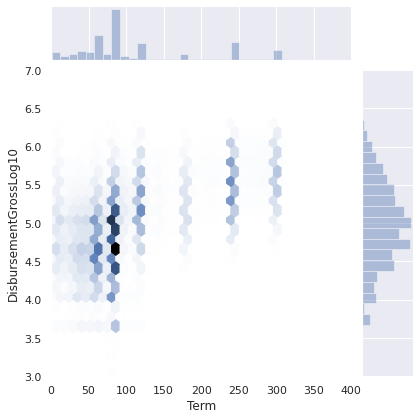

In [67]:
#sns.distplot(np.log(loans['DisbursementGross']))
TermGDN0 = loans.loc[((loans.DisbursementGross > 0) & (loans.Term > 0)), ['Term','DisbursementGross']]
TermGDN0['DisbursementGrossLog10'] = np.log10(TermGDN0['DisbursementGross'])
sns.jointplot("Term", "DisbursementGrossLog10", data = TermGDN0, kind = 'hex', ylim = (3,7) , xlim = (0,400))

We compare loans that were low document versus those that were not. The following violin plots show that low document loans cut off at \$100,000. Loans obtained with full documentation exhibit a more normal distribution.

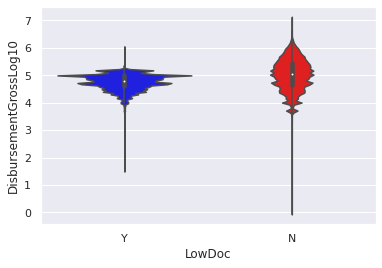

In [68]:
LDGDN0 = loans.loc[((loans.DisbursementGross > 0) & ((loans.LowDoc == 'Y') | (loans.LowDoc == 'N')))
                    , ['LowDoc','DisbursementGross']]
LDGDN0['DisbursementGrossLog10'] = np.log10(LDGDN0['DisbursementGross'])
sns.violinplot(x = 'LowDoc', y = 'DisbursementGrossLog10', data = LDGDN0, palette = ['blue', 'red'], scale = 'area')

However, this is not the only consideration. The previous chart showed both types of loans with both representations having the same area. The next chart is adjusted and shows not only the distribution of the loans but the relative number of loans that are low doc versus full doc. Obviously many more full doc loans were made than no doc loans.

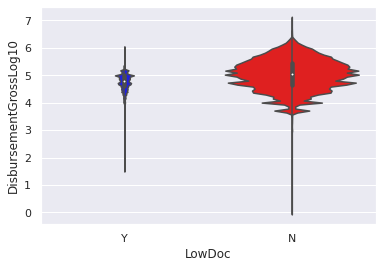

In [69]:
sns.violinplot(x = 'LowDoc', y = 'DisbursementGrossLog10', data = LDGDN0, palette = ['blue', 'red'], scale = 'count')

Plot ratio of SBA_Approve versus GrAppv. The graph below shows definite lines of percentage. Some loans exhibit a one to one relationship between GrAppv and SBA_Appv. Other loans only get a percentage approved. There definitely appears to be certain standard percentages in the data.

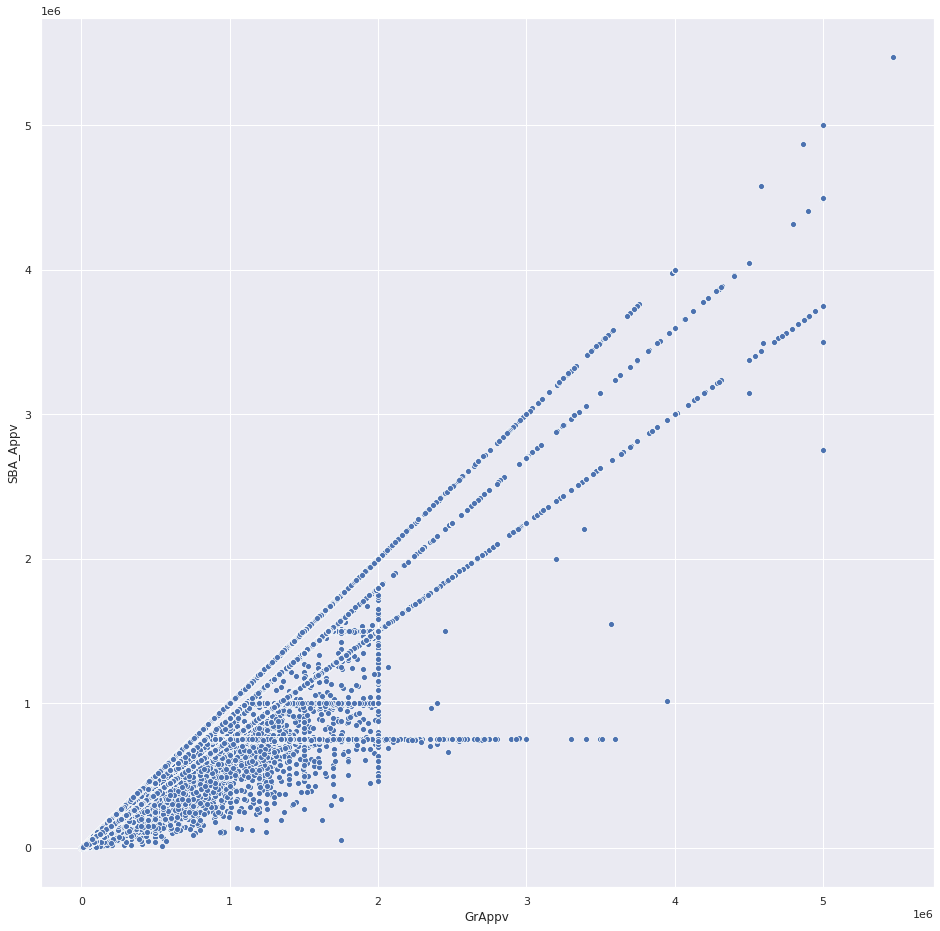

In [70]:
plt.rcParams['figure.figsize'] = [16,16]
sns.scatterplot(x= 'GrAppv', y = 'SBA_Appv', data = loans)

Urban rural breakdown is examined with respect to amount and term below. Code for multiple plots was adapted from [seaborn website.](https://seaborn.pydata.org/examples/multiple_joint_kde.html) Getting subset of data frame from [stackoverflow.](https://stackoverflow.com/questions/54609038/how-to-extract-every-nth-row-from-dataframe) Loans with the longest terms skew heavily urban. At the seven-year term mark it appears that the range of urban loans encompasses lesser amounts than rural loans. The number of rural loans is greater for ten-, fifteen- and twenty-year loan terms. Only one tenth of the data was used due to rendering time.

Text(0.5, 1.0, 'Amount of money loaned by term broken down by urban versus rural receipinets, Red is for urban, Blue is rural')

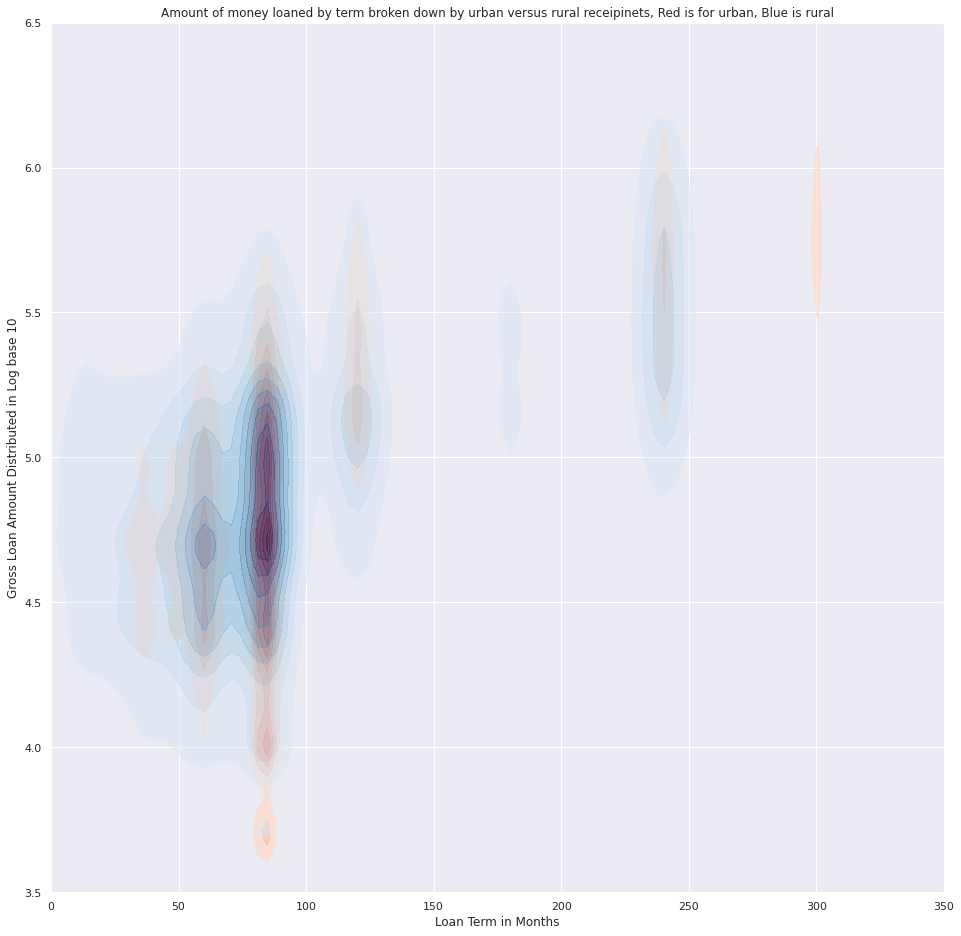

In [71]:
sns.set(style="darkgrid")

urban = loans.query("(UrbanRural == '1') & (DisbursementGross > 0) & (Term > 0)")
rural = loans.query("(UrbanRural == '2') & (DisbursementGross > 0) & (Term > 0)")

# reduce the number of rows otherwise takes 30 minutes to render
urban = urban[(urban.index % 10 == 1)]
rural = rural[(rural.index % 10 == 1)]

urban['DisbursementGrossLog10'] = np.log10(urban['DisbursementGross'])
rural['DisbursementGrossLog10'] = np.log10(rural['DisbursementGross'])

# Set up the figure
f, ax = plt.subplots(figsize=(16, 16))
#ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(urban.Term, urban.DisbursementGrossLog10,
                 cmap="Reds", shade=True, shade_lowest=False, clip = [[0,350],[3.5,6.5]], alpha = 0.7)
ax = sns.kdeplot(rural.Term, rural.DisbursementGrossLog10,
                 cmap="Blues", shade=True, shade_lowest=False, clip = [[0,350],[3.5,6.5]], alpha = 0.5)

plt.xlabel('Loan Term in Months')
plt.ylabel('Gross Loan Amount Distributed in Log base 10')
plt.title('Amount of money loaned by term broken down by urban versus rural receipinets, Red is for urban, Blue is rural')


## Explore Attributes and Class

Histograms between response and explanatory features are compared below. This was done as a reference point for further analysis

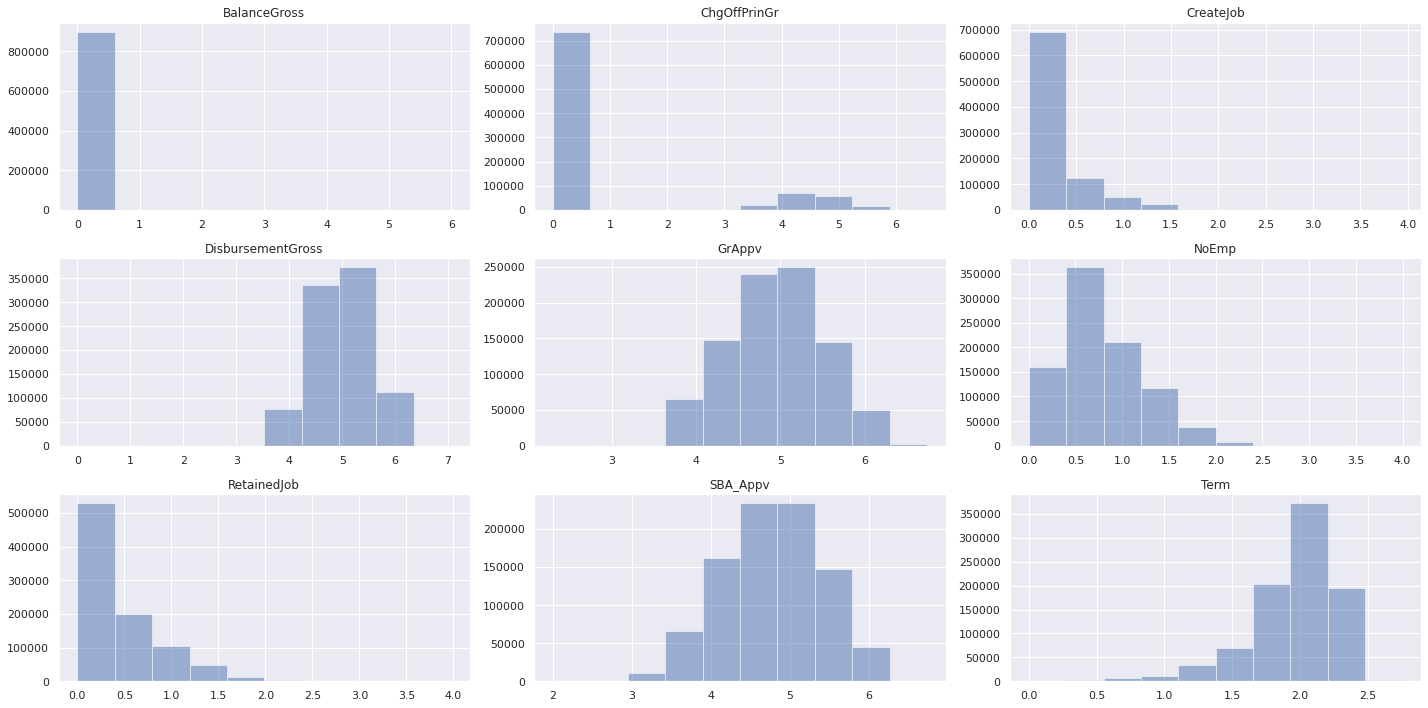

In [72]:
#Create a transformed dataframe of continuous data
logdata = loans[continuous_data]
#add 1 to all values to avoid log10 of 0 which is inf and preform log10 transform
logdata +=1
logdata = logdata.apply(np.log10)

logdata.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

**BalanceGross**, **RetainedJob**, **ChgOffPrinGr**, and **CreateJob** are response features as they are determined after a loan completes. Thus, any of these response terms correlated with explanatory terms are significant and noteworthy due to their possible predictive power.  Additionally, if any of the response variables are correlated with each other, we may need a process like PCA, but applied against a set of response variables.

**DisbursementGross**, **SBA_Approv**, and **GrAppV** are highly correlated and these variables were included in our PCA analysis below.

**ChgOffPrinGr** is negatively correlated with **Term**.  This suggests that for a customer with a defaulted loan - shorter terms lead to larger charge-offs.  This scenario appears to occur when a customer asks for larger loans with a short term; defaults for these customers may occur due low revenues, or unforeseen expenses that exceed the value of the loan.

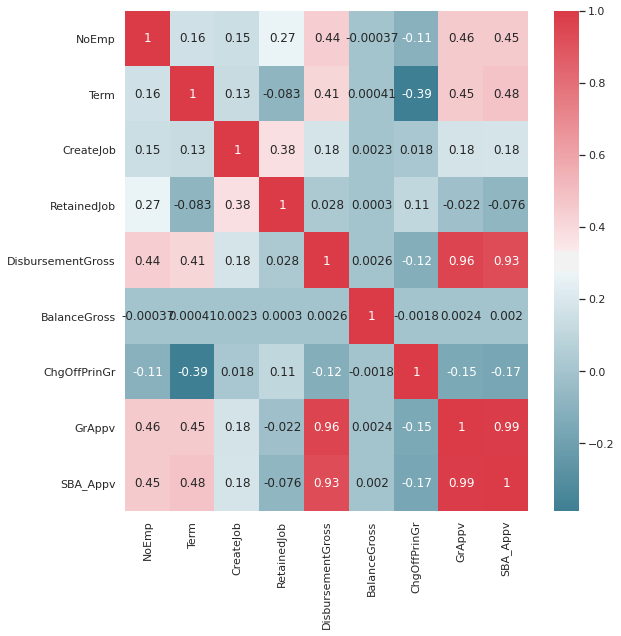

In [73]:
#Generate a correlation matrix of transformed data
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

sns.set(style="darkgrid") # one of the many styles to plot using
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(logdata.corr(), cmap=cmap, annot=True)
f.tight_layout()

Used both [Medium article on pie plots](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) and [Python Data Science Handbook by Jake VanderPlas] to implement the following code. The donut graph below shows three things. The center band of the donut shows the proportion of loans that were paid in full versus those that had to be charged off, roughly one sixth of the loans had to be charged off. The outer band shows the breakdown of loans made to new versus existing businesses. The data looks consistent from with roughly the same percentage being new or existing for both charged off loans and paid in full loans. Finally, the inner band shows loans by location of business against paid off or charged off. It should be noted that amongst loans that were charge offs a high proportion of them were made to businesses in Urban locations.

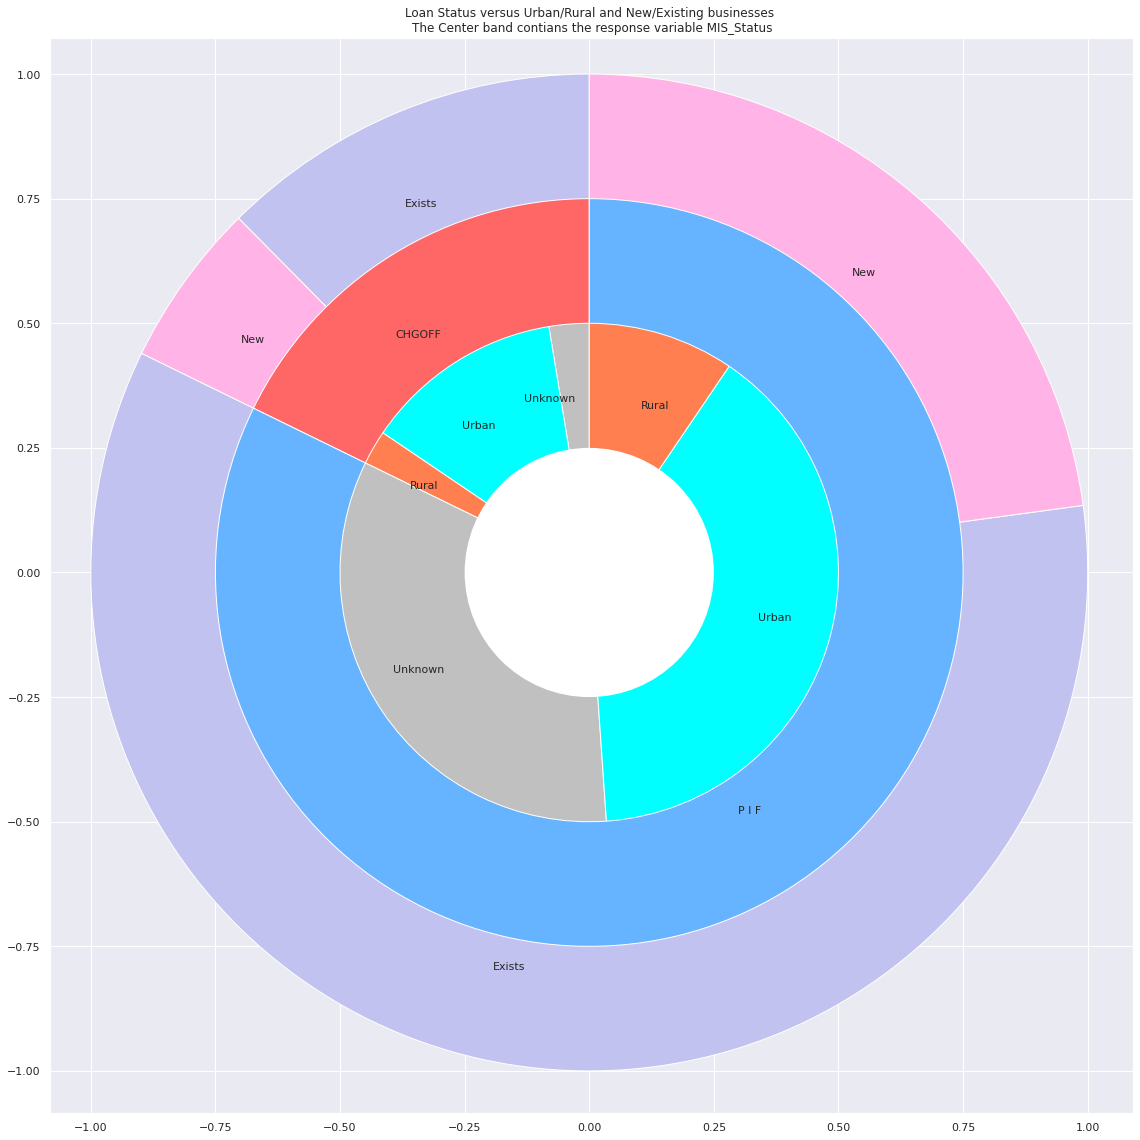

In [74]:
#'UrbanRural',
MSlabels = ['CHGOFF', 'P I F']
NElabels = ['Exists', 'New', 'Exists', 'New']
URlabels = ['Unknown', 'Urban', 'Rural','Unknown', 'Urban', 'Rural']

loansMSNEN0 = loans[(loans.NewExist != 0) & (loans.MIS_Status != "Not Disbursed")]

loansSize = loansMSNEN0.groupby(['MIS_Status'])['MIS_Status'].count()
colors = ['#ff6666', '#66b3ff']
colors_NewExist = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
colors_UrbanRural = ['silver','aqua', 'coral', 'silver','aqua', 'coral']
NESize = loansMSNEN0.groupby(['MIS_Status','NewExist'])['MIS_Status'].count()
RUSize = loansMSNEN0.groupby(['MIS_Status','UrbanRural'])['MIS_Status'].count()

plt.pie(NESize, labels=NElabels, colors=colors_NewExist, startangle=90,frame=True, labeldistance=0.8)

plt.pie(loansSize, labels=MSlabels, colors=colors,radius=0.75, startangle=90,frame=True, labeldistance=0.75)

plt.pie(RUSize, labels=URlabels, colors=colors_UrbanRural,radius=0.5, startangle=90,frame=True, labeldistance=0.7)

centre_circle = plt.Circle((0,0),0.25,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.set_facecolor('white') 
plt.title("Loan Status versus Urban/Rural and New/Existing businesses \nThe Center band contians the response variable MIS_Status")

plt.axis('equal')
plt.tight_layout()
plt.show()

This boxen plot shows the relative gross distributions on a log base 10 scale for loans that are "P I F" or paid in full and loans that are "chgoff" or charge off, meaning they failed. It is immediately noticeable that the median "PIF" loan is higher than the median "CHGOFF" loan. Also, the "PIF loans has a longer tail on the high side of the loans. The "CHGOFF" loans have a longer tail on the low side of the loans.

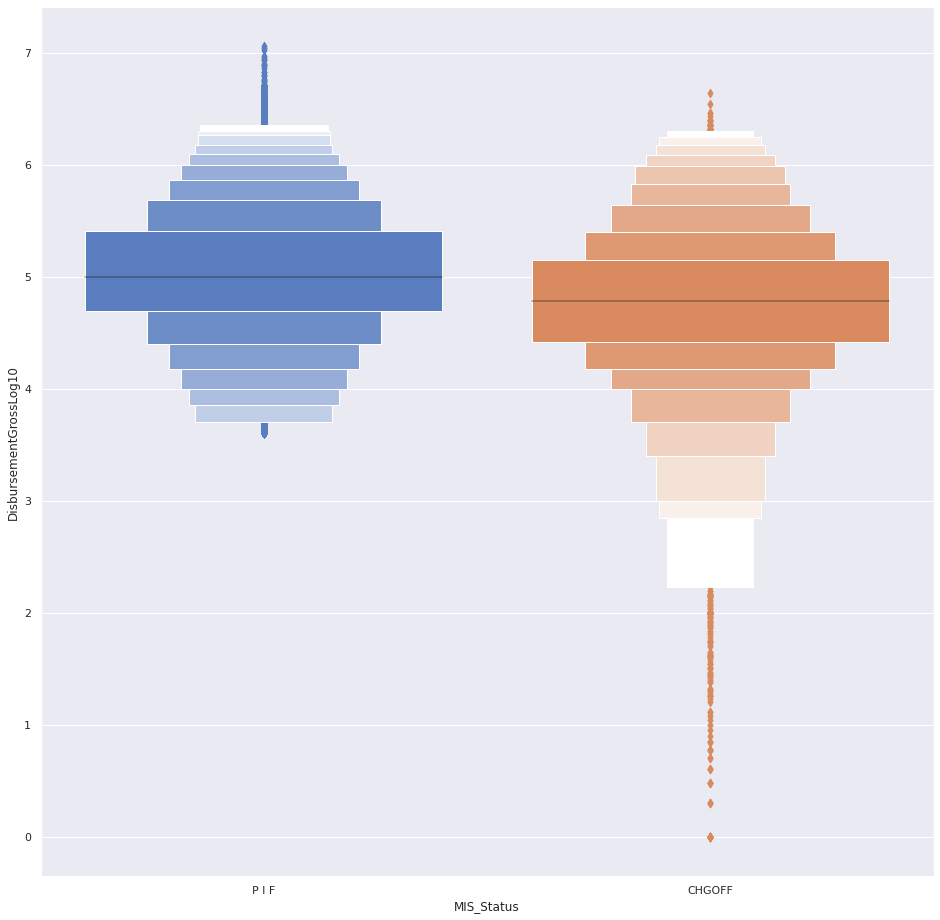

In [75]:
#GrAppv, 'MIS_Status'
#'CHGOFF','P I F'
MSGDN0 = loans.loc[((loans.DisbursementGross > 0) & ((loans.MIS_Status == 'CHGOFF') | (loans.MIS_Status == 'P I F')))
                    , ['MIS_Status','DisbursementGross']]
MSGDN0['DisbursementGrossLog10'] = np.log10(LDGDN0['DisbursementGross'])
sns.boxenplot(y = 'DisbursementGrossLog10', data = MSGDN0, palette = "muted", x = 'MIS_Status', scale = 'area')


## New Features

**SubsequentLoan:** Identify business that have additional loans after their first loan. Take unique combinations of "Name", "City", "State", and "Zip" that have more than one loan. Using the earliest "DisbursementDate" for each unique combination mark any loan afterwards as "SubsequentLoan = 'Y'".

**IndustrySector:** Categorical variable derived from NAICS. The six digits of the NAICS code make up a heirarchy. The first two digits correspond to broad industry classifications like "11" agriculture, "21" mining etc... Please see [NAICS code list](https://www.naics.com/search/)

**DisbursementGrossByTerm:** Divide the total amount of the loan disbursed by the term in months. This would be useful to compare to loan outcome, do higher values lead to more defaults.

**AmountOfLoansbyValue:** Create a variable that for every $10,000 increment sums how much money was loaned. We can check the total distribution of the sum of money loaned versus just a count of loans.

**PCA:** PCA components can be added in. Care must be taken to only use explanatory variables in the PCA. This dataset has many response variables as well and they should not be mixed together for PCA.

**GrossLoanAmountPerJobCreated:** Examining only successful loans we can measure how much money it took to create a job.

**GrossLoanAmountPerJobRetained:** Examining only successful loans we can measure how much money it took to retain a job.

**ChargeOffDateDifference:** Take the difference between loan disbursed date and the charge off date for failed loans. Can be used to determine loans that failed quickly versus those that took a long time.

**DerivedNameVarGeneric:** Parse the "Name" variable and derive classifications from it. Could be used to seperate out everyone who had "D.D.S" in their name for instance. Would be of little use for general question but could be of interest to ask questions about specific subsets of businesses.

Additionally many of our variables are heavily skewed. We can normalize and bin these variables as necessary.

## Exceptional Work

This group would like to have the following subsections considered for exceptional work as they used techniques not covered by lectures for this project, provided additional insight through additional creative plots, and using the understanding of features to clean data.

###Plots

Advanced plots were added including a donut plot that shows a breakdow of two different explanatory variables values by the categorical response variable. Also, a heat map was created showing the correlation between the five continuous explanatory variables.

### Data Cleaning

We would like to have the logic used for **MIS_Status** feature cleaning to be considered for exceptional work as it required an understanding of how multiple features work together to generate a specific MIS status and the correct coding to generate to appropriate correction of NA data for that feature.

### Principal Components Analysis (PCA)

Principal Components Analysis (PCA) was performed on continuous data from the loans data frame.  **RetainedJob** and **BalanceGross** were removed from the continuous data as they are response variables and we intend for principal components to only describe variance in explanatory features. A new dataframe, called df_scaled, was created to contain the **loans** continuous explanatory data.  Once the new data frame was created, all values were standardized to allow for all features to be on the same scale.  Standardization was necessary because features containing currency (ie **DisbursementGross**) had a very large spread and business attributes (ie **NoEmp**) had a much smaller scale.  Preforming PCA on non-standardized data would show large variances, which would not accurately represent the data.

In [76]:
from sklearn.preprocessing import StandardScaler #standardizes data
from sklearn.preprocessing import LabelEncoder # converts categories to int

pca_data = ['NoEmp','Term','CreateJob','DisbursementGross',
            'ChgOffPrinGr','GrAppv','SBA_Appv']
pca_df = loans[pca_data]

# Standardize continuous data
df_scaled = pd.DataFrame(StandardScaler().fit_transform(pca_df),columns = pca_df.columns)

# Add response features for LDA
df_scaled['MIS_Status'] = loans['MIS_Status']
df_scaled['MIS_Status_code'] = loans.MIS_Status.astype("category").cat.codes

#Check that data frame is complete
df_scaled.head()

,NoEmp,Term,CreateJob,DisbursementGross,ChgOffPrinGr,GrAppv,SBA_Appv,MIS_Status,MIS_Status_code
0,-0.100008,-0.339523,-0.035618,-0.490732,-0.207258,-0.468425,-0.444322,P I F,1.0
1,-0.126996,-0.643870,-0.035618,-0.560263,-0.207258,-0.539031,-0.514370,P I F,1.0
2,-0.059527,0.877863,-0.035618,0.298443,-0.207258,0.332945,0.287895,P I F,1.0
3,-0.126996,-0.643870,-0.035618,-0.577645,-0.207258,-0.556682,-0.531882,P I F,1.0
4,0.034929,1.638729,-0.006044,0.096804,-0.207258,0.128189,0.348093,P I F,1.0


In [0]:
from sklearn.decomposition import PCA

x = df_scaled[pca_data]
y = df_scaled.MIS_Status_code

pca = PCA(n_components=5)
X_pca = pca.fit(x).transform(x)

principalDf = pd.DataFrame(data = X_pca,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
finalDf = pd.concat([principalDf, df_scaled[['MIS_Status_code']]], axis = 1)

Scree plots were used to visually identify the optimal number of principal components needed to capture the maximum amount of variance in the data set.  This can be done by visually identifying the bend, or "elbow", in the scree plot; where principal components after the bend do not contribute a large percentage of the variance explained.  The value at which the elbow occurs is deemed the optimal number of components that explains the percent variance in the data.  For the loans continuous data, after PCA was performed the scree plot revealed that 2 principal components is optimal.

Text(0.5, 1.0, 'PCA Scree Plot')

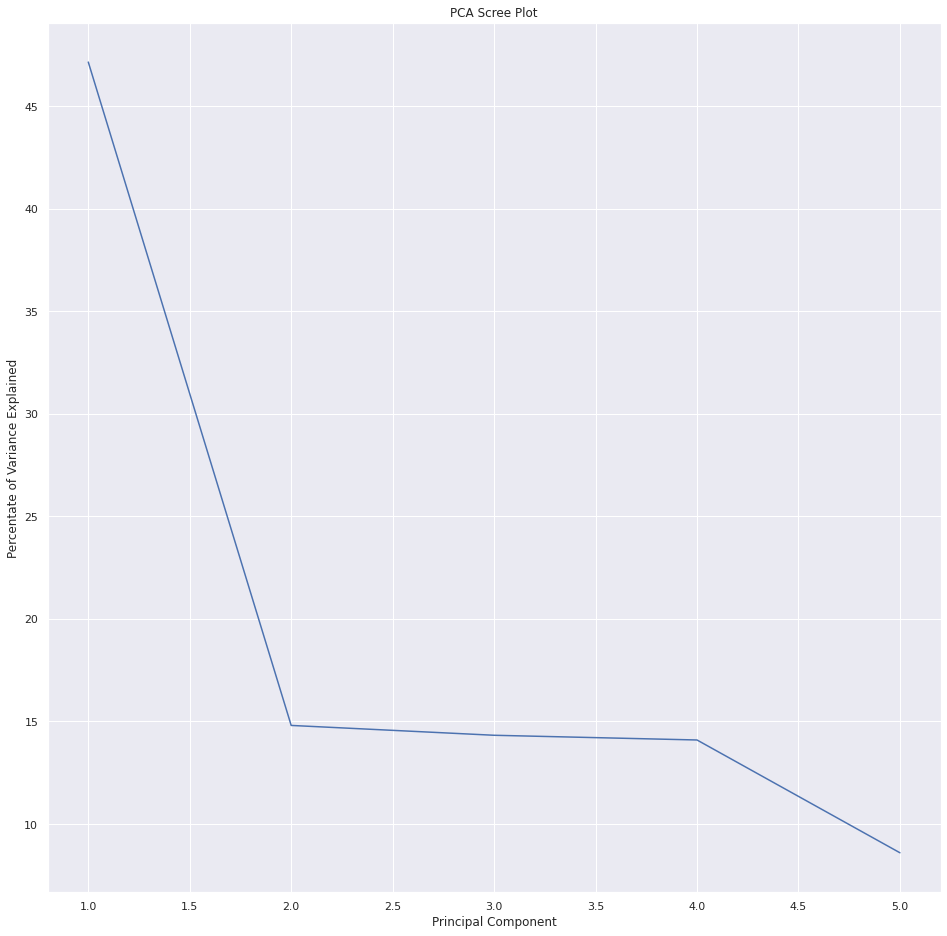

In [78]:
#Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
plt.plot(range(1,6),percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')

## Bibliography
IPython Interactive Computing and Visualization Cookbook by Cyrille Rossant

Python for Data Analysis 2nd Edition by Wes McKinney

Python Data Science Handbook by Jake VanderPlas

Data Preprocessing with Python for Absolute Beginners by M. Usman Malik

Data Visualization with Python for Beginners by M. Usman Malik

